# **Brain Hemorrhage Segmentation**

# Data cleaning and organization

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import tqdm
import matplotlib.pyplot
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os

In [ ]:
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
!rm -rf /content/gdrive

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Segmentation/epidural_images")
!ls

brain_bone_window  max_contrast_window	 subdural_window
brain_window	   Results_Epidural.csv


In [ ]:
file_dir = '/content/gdrive/My Drive/Segmentation/epidural_images/'

In [ ]:
labels = pd.read_csv('/content/gdrive/My Drive/Segmentation/epidural_images/Results_Epidural.csv')
# Using directory 


In [ ]:
labels = labels[labels["Labeling State"].str.contains("Ready") == False]
labels = labels[labels["Labeling State"].str.contains("In Progress") == False]

In [ ]:
labels.columns = labels.columns.str.replace(' ', '')

In [ ]:
labels.shape

(310, 14)

In [ ]:
labels.Origin

0      ID_004c4b319.jpg
2      ID_02e2d273d.jpg
5      ID_03c6a01ca.jpg
6      ID_03c6a01ca.jpg
7      ID_045196c9f.jpg
             ...       
590    ID_aa6b7bf5d.jpg
602    ID_f82e15eb5.jpg
604    ID_7a80f92cf.jpg
608    ID_d9bfa60ed.jpg
609    ID_fa2874be0.jpg
Name: Origin, Length: 310, dtype: object

In [ ]:
labels.CorrectLabel

In [ ]:
labels = labels.loc[labels["CorrectLabel"] != "[[], []]"]

Remove flagged data

In [ ]:
labels = labels.loc[labels["Origin"] != "ID_20440abc6.jpg"]

In [ ]:
labels = labels.loc[labels["Origin"] != "ID_00178eb80.jpg"]

In [ ]:
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("'x': ", "", regex=True)
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("'y': ", "", regex=True)
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("[", "", regex=True)
labels['CorrectLabel'] = labels['CorrectLabel'].str.replace("]", "", regex=True)


In [ ]:
labels.CorrectLabel

In [ ]:
print(labels.CorrectLabel[0])
print(type(labels.CorrectLabel[0]))

In [ ]:
labels.drop_duplicates(subset="CorrectLabel", keep=False, inplace=True)


In [ ]:
labels.reset_index(inplace = True,drop = True)

In [ ]:
labels = labels.loc[labels["Origin"] != "ID_20440abc6.jpg"]
labels = labels.loc[labels["Origin"] != "ID_20440abc6.jpg"]
labels = labels.loc[labels["Origin"] != "ID_20440abc6.jpg"]

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(labels)

In [ ]:
poly_list=[]

In [ ]:
print(len(poly_list))
print(poly_list)

198
[[[275, 458], [275, 457], [274, 457], [271, 457], [271, 456], [270, 456], [267, 456], [267, 455], [266, 455], [263, 455], [263, 454], [262, 454], [260, 454], [260, 453], [259, 453], [257, 453], [257, 452], [256, 452], [253, 452], [253, 451], [252, 451], [250, 451], [250, 450], [241, 450], [241, 451], [204, 451], [204, 449], [205, 449], [205, 445], [206, 445], [206, 442], [207, 442], [207, 438], [208, 438], [208, 435], [209, 435], [209, 431], [210, 431], [210, 428], [211, 428], [211, 424], [212, 424], [212, 421], [213, 421], [213, 417], [214, 417], [214, 414], [215, 414], [215, 410], [216, 410], [216, 407], [217, 407], [217, 403], [218, 403], [218, 400], [219, 400], [219, 396], [220, 396], [220, 394], [221, 394], [221, 393], [222, 393], [222, 391], [223, 391], [223, 390], [224, 390], [224, 388], [225, 388], [225, 387], [226, 387], [226, 385], [227, 385], [227, 383], [228, 383], [228, 382], [229, 382], [229, 380], [230, 380], [230, 379], [231, 379], [231, 377], [232, 377], [232, 376]

In [ ]:
index = 0
for i in labels.CorrectLabel:
  print(index)
  ts = eval(labels.CorrectLabel[index])
  print(type(ts))
  ts = list(ts)
  print(type(ts))
  print(type(ts[0]))
  print(ts)
  j = 0
  for i in ts:
    ts[j]= list(i)
    l = ts[j]
    j += 1
    f = 0
    for k in i:
      l[f]= int(l[f] * 512)
      f += 1
  poly_list.append(ts)
  index += 1

In [ ]:
os.chdir("/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/")
!ls

Create list of ids and names

In [ ]:
origin_list = []

In [ ]:
id_list = []

In [ ]:
for i in labels.Origin:
  origin_list.append(i)

print(len(origin_list))
print(origin_list)


198
['ID_004c4b319.jpg', 'ID_02e2d273d.jpg', 'ID_045196c9f.jpg', 'ID_0513bfa29.jpg', 'ID_053172482.jpg', 'ID_056e14224.jpg', 'ID_07ad70ea0.jpg', 'ID_07c565939.jpg', 'ID_0f91fde95.jpg', 'ID_1147d3c37.jpg', 'ID_1193c693f.jpg', 'ID_12534e78f.jpg', 'ID_16b052b18.jpg', 'ID_187239b3e.jpg', 'ID_1acf75b05.jpg', 'ID_1b04e9681.jpg', 'ID_1ef06a053.jpg', 'ID_1f054a3fd.jpg', 'ID_1f0ae213d.jpg', 'ID_1f2f4ec16.jpg', 'ID_206d7a35e.jpg', 'ID_21449fbe6.jpg', 'ID_2396ffa79.jpg', 'ID_263f3a153.jpg', 'ID_279a7f7d1.jpg', 'ID_293f241cf.jpg', 'ID_299d69f86.jpg', 'ID_2bbbb6040.jpg', 'ID_2cd69fa1f.jpg', 'ID_30cf072fd.jpg', 'ID_327061158.jpg', 'ID_32a4e0962.jpg', 'ID_33b0555d3.jpg', 'ID_33b273efe.jpg', 'ID_356190e51.jpg', 'ID_36cf3008b.jpg', 'ID_38219594b.jpg', 'ID_38254edcb.jpg', 'ID_3a4e45124.jpg', 'ID_3ac31747b.jpg', 'ID_3b24b9be4.jpg', 'ID_3b48698b8.jpg', 'ID_3b5344b9c.jpg', 'ID_3cea8c1f7.jpg', 'ID_3ceea3f62.jpg', 'ID_3e14f9e5d.jpg', 'ID_3f76cf7a6.jpg', 'ID_404a9e458.jpg', 'ID_41dc4a3ea.jpg', 'ID_42a71ea3a.j

In [ ]:
for i in labels.CaseID:
  id_list.append(str(i))

print(len(id_list))
print(id_list)

198
['1196514', '1196477', '1196959', '1196905', '1196504', '1196951', '1196577', '1196928', '1196525', '1196880', '1196857', '1196581', '1196943', '1196592', '1196565', '1196944', '1196856', '1196763', '1196896', '1196853', '1196511', '1196521', '1196534', '1196964', '1196961', '1196501', '1196562', '1196529', '1196918', '1196487', '1196854', '1196500', '1196901', '1196552', '1196913', '1196517', '1196533', '1196866', '1196909', '1196558', '1196570', '1196519', '1196902', '1196965', '1196568', '1196890', '1196549', '1196498', '1196531', '1196516', '1196950', '1196557', '1196555', '1196929', '1196949', '1196530', '1196871', '1196874', '1196503', '1196941', '1196587', '1196518', '1196859', '1196563', '1196875', '1196882', '1196569', '1196947', '1196957', '1196472', '1196879', '1196852', '1196962', '1196938', '1196865', '1196571', '1196908', '1196561', '1196858', '1196804', '1196591', '1196867', '1196971', '1196885', '1196475', '1196966', '1196923', '1196914', '1196617', '1196576', '1196

In [ ]:
img_num = 0
mask_num = 0

In [ ]:
newname_list = []

In [ ]:
print(origin_list)
print(len(origin_list))

['ID_004c4b319.jpg', 'ID_02e2d273d.jpg', 'ID_045196c9f.jpg', 'ID_0513bfa29.jpg', 'ID_053172482.jpg', 'ID_056e14224.jpg', 'ID_07ad70ea0.jpg', 'ID_07c565939.jpg', 'ID_0f91fde95.jpg', 'ID_1147d3c37.jpg', 'ID_1193c693f.jpg', 'ID_12534e78f.jpg', 'ID_16b052b18.jpg', 'ID_187239b3e.jpg', 'ID_1acf75b05.jpg', 'ID_1b04e9681.jpg', 'ID_1ef06a053.jpg', 'ID_1f054a3fd.jpg', 'ID_1f0ae213d.jpg', 'ID_1f2f4ec16.jpg', 'ID_206d7a35e.jpg', 'ID_21449fbe6.jpg', 'ID_2396ffa79.jpg', 'ID_263f3a153.jpg', 'ID_279a7f7d1.jpg', 'ID_293f241cf.jpg', 'ID_299d69f86.jpg', 'ID_2bbbb6040.jpg', 'ID_2cd69fa1f.jpg', 'ID_30cf072fd.jpg', 'ID_327061158.jpg', 'ID_32a4e0962.jpg', 'ID_33b0555d3.jpg', 'ID_33b273efe.jpg', 'ID_356190e51.jpg', 'ID_36cf3008b.jpg', 'ID_38219594b.jpg', 'ID_38254edcb.jpg', 'ID_3a4e45124.jpg', 'ID_3ac31747b.jpg', 'ID_3b24b9be4.jpg', 'ID_3b48698b8.jpg', 'ID_3b5344b9c.jpg', 'ID_3cea8c1f7.jpg', 'ID_3ceea3f62.jpg', 'ID_3e14f9e5d.jpg', 'ID_3f76cf7a6.jpg', 'ID_404a9e458.jpg', 'ID_41dc4a3ea.jpg', 'ID_42a71ea3a.jpg',

In [ ]:
import shutil
for i in range(198):
  # Source path
  source = "/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/" + origin_list[i]
  
  # Destination path
  destination = "/content/gdrive/My Drive/Segmentation/GoldStdImages/" + origin_list[i]
  
  # Copy the content of
  # source to destination

  try:
      shutil.copy(source, destination)
      print("File copied successfully.")
  
  # If source and destination are same
  except shutil.SameFileError:
      print("Source and destination represents the same file.")
 

In [ ]:
print(len(poly_list))
print(poly_list)

In [ ]:
# print(ts1)
# j = 0
# for i in ts1:
#   ts1[j]= list(i)
#   l = ts1[j]
#   j += 1
#   f = 0
#   for k in i:
#     l[f]= int(l[f] * 512)
#     f += 1

# print(ts1)

In [ ]:
ts = eval(labels.CorrectLabel[0])
print(type(ts))
ts = list(ts)
print(type(ts))
print(type(ts[0]))
print(ts)

In [ ]:
print(type(ts))
print(type(ts[0]))

<class 'list'>
<class 'list'>


In [ ]:
poly_image_list = []

In [ ]:
print(poly_list[0])

[[275, 458], [275, 457], [274, 457], [271, 457], [271, 456], [270, 456], [267, 456], [267, 455], [266, 455], [263, 455], [263, 454], [262, 454], [260, 454], [260, 453], [259, 453], [257, 453], [257, 452], [256, 452], [253, 452], [253, 451], [252, 451], [250, 451], [250, 450], [241, 450], [241, 451], [204, 451], [204, 449], [205, 449], [205, 445], [206, 445], [206, 442], [207, 442], [207, 438], [208, 438], [208, 435], [209, 435], [209, 431], [210, 431], [210, 428], [211, 428], [211, 424], [212, 424], [212, 421], [213, 421], [213, 417], [214, 417], [214, 414], [215, 414], [215, 410], [216, 410], [216, 407], [217, 407], [217, 403], [218, 403], [218, 400], [219, 400], [219, 396], [220, 396], [220, 394], [221, 394], [221, 393], [222, 393], [222, 391], [223, 391], [223, 390], [224, 390], [224, 388], [225, 388], [225, 387], [226, 387], [226, 385], [227, 385], [227, 383], [228, 383], [228, 382], [229, 382], [229, 380], [230, 380], [230, 379], [231, 379], [231, 377], [232, 377], [232, 376], [23

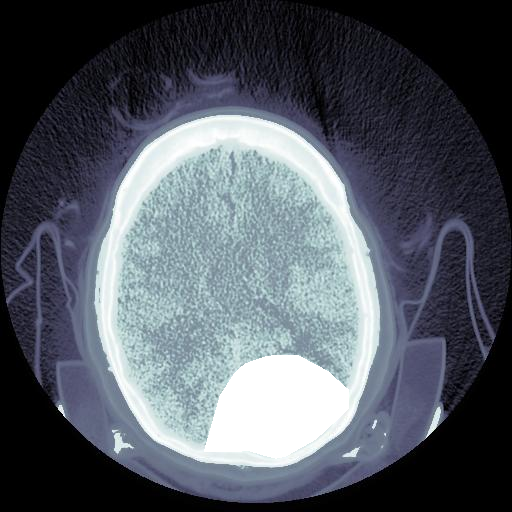

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read an image
img_num = 0
img = cv2.imread("/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/" + origin_list[img_num])

# Define an array of endpoints of triangle
points = np.array(poly_list[img_num])
  
# Use fillPoly() function and give input as
# image, end points,color of polygon
# Here color of polygon will blue
cv2.fillPoly(img, pts=[points], color=(255, 255, 255))
  
# Displaying the image
cv2_imshow(img)
  
# wait for the user to press any key to 
# exit window
cv2.waitKey(0)
  
# Closing all open windows
cv2.destroyAllWindows()

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Segmentation/")
!ls

epidural_images  Masks


In [ ]:
print(origin_list)

['ID_004c4b319.jpg', 'ID_02e2d273d.jpg', 'ID_045196c9f.jpg', 'ID_0513bfa29.jpg', 'ID_053172482.jpg', 'ID_056e14224.jpg', 'ID_07ad70ea0.jpg', 'ID_07c565939.jpg', 'ID_0f91fde95.jpg', 'ID_1147d3c37.jpg', 'ID_1193c693f.jpg', 'ID_12534e78f.jpg', 'ID_16b052b18.jpg', 'ID_187239b3e.jpg', 'ID_1acf75b05.jpg', 'ID_1b04e9681.jpg', 'ID_1ef06a053.jpg', 'ID_1f054a3fd.jpg', 'ID_1f0ae213d.jpg', 'ID_1f2f4ec16.jpg', 'ID_206d7a35e.jpg', 'ID_21449fbe6.jpg', 'ID_2396ffa79.jpg', 'ID_263f3a153.jpg', 'ID_279a7f7d1.jpg', 'ID_293f241cf.jpg', 'ID_299d69f86.jpg', 'ID_2bbbb6040.jpg', 'ID_2cd69fa1f.jpg', 'ID_30cf072fd.jpg', 'ID_327061158.jpg', 'ID_32a4e0962.jpg', 'ID_33b0555d3.jpg', 'ID_33b273efe.jpg', 'ID_356190e51.jpg', 'ID_36cf3008b.jpg', 'ID_38219594b.jpg', 'ID_38254edcb.jpg', 'ID_3a4e45124.jpg', 'ID_3ac31747b.jpg', 'ID_3b24b9be4.jpg', 'ID_3b48698b8.jpg', 'ID_3b5344b9c.jpg', 'ID_3cea8c1f7.jpg', 'ID_3ceea3f62.jpg', 'ID_3e14f9e5d.jpg', 'ID_3f76cf7a6.jpg', 'ID_404a9e458.jpg', 'ID_41dc4a3ea.jpg', 'ID_42a71ea3a.jpg',

In [ ]:
print(id_list)

['1196514', '1196477', '1196959', '1196905', '1196504', '1196951', '1196577', '1196928', '1196525', '1196880', '1196857', '1196581', '1196943', '1196592', '1196565', '1196944', '1196856', '1196763', '1196896', '1196853', '1196511', '1196521', '1196534', '1196964', '1196961', '1196501', '1196562', '1196529', '1196918', '1196487', '1196854', '1196500', '1196901', '1196552', '1196913', '1196517', '1196533', '1196866', '1196909', '1196558', '1196570', '1196519', '1196902', '1196965', '1196568', '1196890', '1196549', '1196498', '1196531', '1196516', '1196950', '1196557', '1196555', '1196929', '1196949', '1196530', '1196871', '1196874', '1196503', '1196941', '1196587', '1196518', '1196859', '1196563', '1196875', '1196882', '1196569', '1196947', '1196957', '1196472', '1196879', '1196852', '1196962', '1196938', '1196865', '1196571', '1196908', '1196561', '1196858', '1196804', '1196591', '1196867', '1196971', '1196885', '1196475', '1196966', '1196923', '1196914', '1196617', '1196576', '1196484'

In [ ]:
print(type(id_list[0]))

<class 'str'>


In [ ]:
print(len(origin_list))

198


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Read an image
for i in range(198):
  print(i)
  print(origin_list[i])
  img = cv2.imread("/content/gdrive/My Drive/Segmentation/epidural_images/max_contrast_window/" + origin_list[i])

  # Define an array of endpoints of triangle
  points = np.array(poly_list[i])
  black = np.array([[0,0], [0,512], [512,512], [512,0]])
  # Use fillPoly() function and give input as
  # image, end points,color of polygon
  # Here color of polygon will blue
  cv2.fillPoly(img, pts=[black], color=(0, 0, 0))
  cv2.fillPoly(img, pts=[points], color=(255, 255, 255))
    
  # Displaying the image
  cv2_imshow(img)

  cv2.imwrite('/content/gdrive/My Drive/Segmentation/Masks/' + origin_list[i] , img)


In [ ]:
from PIL import Image
for i in range(198):
  print(i)
  print(origin_list[i])
  #read the image
  color_image = Image.open('/content/gdrive/My Drive/Segmentation/Masks/' + origin_list[i])
  
  #convert the image to black and white mode with dither set to None
  bw = color_image.convert('1', dither=Image.NONE)
  
  #save the image with name "BW_image.jpg"
  bw.save('/content/gdrive/My Drive/Segmentation/MasksBW/' + origin_list[i])

In [ ]:
print(poly_list[10])

[[150, 161], [150, 158], [151, 158], [151, 154], [152, 154], [152, 151], [153, 151], [153, 148], [154, 148], [154, 146], [155, 146], [155, 144], [156, 144], [156, 143], [157, 143], [157, 142], [158, 142], [158, 141], [159, 141], [159, 140], [160, 140], [160, 139], [161, 139], [161, 138], [162, 138], [162, 136], [163, 136], [163, 135], [164, 135], [164, 134], [165, 134], [165, 132], [166, 132], [166, 131], [167, 131], [167, 130], [168, 130], [168, 128], [169, 128], [169, 127], [170, 127], [170, 126], [172, 126], [172, 125], [173, 125], [173, 124], [175, 124], [175, 123], [176, 123], [176, 122], [177, 122], [177, 121], [179, 121], [179, 120], [180, 120], [180, 119], [182, 119], [182, 118], [183, 118], [183, 117], [184, 117], [184, 116], [186, 116], [186, 115], [187, 115], [187, 114], [188, 114], [188, 113], [189, 113], [189, 112], [191, 112], [191, 111], [193, 111], [193, 110], [195, 110], [195, 109], [197, 109], [197, 108], [199, 108], [199, 107], [201, 107], [201, 106], [203, 106], [20

In [ ]:
index = 0
for j in poly_list:
  for i in j:
    if len(i) == 1:
      index = (j.index(i))
      j.pop(index)




In [ ]:
for j in poly_list:
  for i in j:
    if len(i) == 1:
      print(i)

In [ ]:
poly_list[10]

In [ ]:
print(origin_list[58])

ID_4d9948949.jpg


In [ ]:
print(len(iterable_new))
print(iterable_new)

198
[([275, 458], [275, 457], [274, 457], [271, 457]), ([238, 183], [238, 182], [237, 182], [229, 182]), ([303, 405], [303, 401], [304, 401], [304, 397]), ([400, 352], [400, 344], [399, 344], [399, 342]), ([110, 335], [110, 334], [109, 334], [105, 334]), ([279, 76], [279, 75], [278, 75], [276, 75]), ([133, 311], [133, 310], [132, 310], [132, 309]), ([193, 362], [193, 361], [192, 361], [187, 361]), ([430, 334], [430, 333], [429, 333], [429, 332]), ([357, 246], [357, 245], [356, 245], [354, 245]), ([150, 161], [150, 158], [151, 158], [151, 154]), ([128, 256], [128, 255], [127, 255], [123, 255]), ([179, 307], [179, 302], [178, 302], [178, 299]), ([119, 329], [119, 328], [118, 328], [118, 326]), ([359, 245], [359, 244], [358, 244], [358, 242]), ([159, 202], [159, 201], [158, 201], [154, 201]), ([357, 338], [357, 336], [356, 336], [356, 335]), ([379, 294], [379, 288], [378, 288], [378, 287]), ([344, 226], [344, 225], [343, 225], [339, 225]), ([128, 196], [128, 195], [127, 195], [127, 194]),

In [ ]:
print(origin)

In [ ]:
img_show = cv2.imread("/content/gdrive/My Drive/Segmentation/GoldStdImages/" + origin_list[7])
cv2_imshow(img_show)

In [ ]:
mask_show = cv2.imread("/content/gdrive/My Drive/Segmentation/Masks/" + origin_list[7])
cv2_imshow(mask_show)

In [ ]:
os.chdir("/content/gdrive/My Drive/Segmentation/GoldStdImages/")
!ls

In [ ]:
os.chdir("/content/gdrive/My Drive/Segmentation/Masks/")
!ls

In [ ]:
import os, glob
 
dir = '/content/gdrive/My Drive/Segmentation/Masks/'
for file in os.scandir(dir):
    os.remove(file.path)

# U-Net

The U-Net algorithm imports the images and masks from their appropriate directories.
see next file...